<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [52]:
# Paquetes necesarios
import gdown
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_score


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [53]:
id = "1IEmt0XWLlmmKXUNx-2VAt5Z5wuaUqDV_"
nombre = "movies.csv"

# Descargar archivo
url = f"https://drive.google.com/uc?id={id}"
gdown.download(url, nombre, quiet=False)

# Cargar el CSV
df = pd.read_csv(nombre)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1IEmt0XWLlmmKXUNx-2VAt5Z5wuaUqDV_
To: /content/movies.csv
100%|██████████| 23.4M/23.4M [00:00<00:00, 65.2MB/s]


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [54]:
# Descripción del conjunto de datos
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [55]:
# Separar las variables
numericas = df[['budget', 'popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']].dropna()

# Escalado de datos
scaler = StandardScaler()
variables_escaladas = scaler.fit_transform(numericas)

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


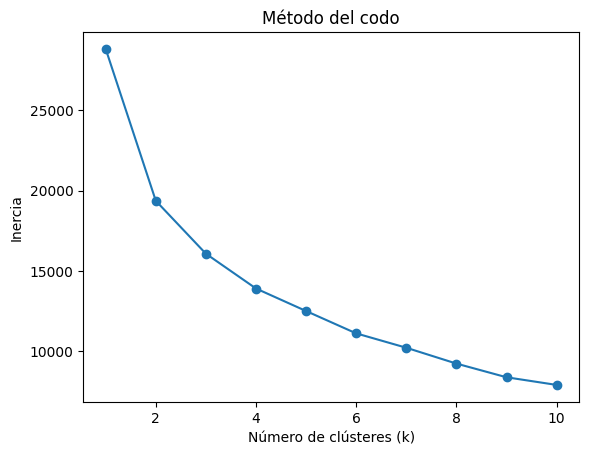

In [56]:
X = variables_escaladas
inercia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

In [57]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans.fit(variables_escaladas)

KMeans(n_clusters=3, random_state=12)

En este caso, se selecciona el valor del punto 3 ya que es el punto en el que cambia la tendencia de la imagen del codo; indicando así que es el número óptimo de clusters

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [58]:
# Asignamos los clústeres
numericas['cluster'] = kmeans.labels_
numericas.head()

,budget,popularity,runtime,revenue,vote_average,vote_count,cluster
0,237000000,150.437577,162.0,2787965087,7.2,11800,0
1,300000000,139.082615,169.0,961000000,6.9,4500,0
2,245000000,107.376788,148.0,880674609,6.3,4466,0
3,250000000,112.312950,165.0,1084939099,7.6,9106,0
4,260000000,43.926995,132.0,284139100,6.1,2124,0


In [59]:
# Media, mínimo y máximo
numericas.groupby('cluster').mean()
numericas.groupby('cluster').min()
numericas.groupby('cluster').max()

,budget,popularity,runtime,revenue,vote_average,vote_count
cluster,,,,,,
0,380000000,875.581305,201.0,2787965087,8.5,13752
1,110000000,62.554173,200.0,341631208,10.0,1671
2,175000000,127.525581,338.0,611899420,10.0,4742


In [60]:
# Mostremos los nombres de 5 pokemones de cada clúster
for cluster in numericas['cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {numericas[numericas["cluster"] == cluster].shape[0]}')
    display(numericas[numericas['cluster'] == cluster].head(5))

Cluster 0: cantidad de elementos 285


,budget,popularity,runtime,revenue,vote_average,vote_count,cluster
0,237000000,150.437577,162.0,2787965087,7.2,11800,0
1,300000000,139.082615,169.0,961000000,6.9,4500,0
2,245000000,107.376788,148.0,880674609,6.3,4466,0
3,250000000,112.312950,165.0,1084939099,7.6,9106,0
4,260000000,43.926995,132.0,284139100,6.1,2124,0


Cluster 2: cantidad de elementos 1751


,budget,popularity,runtime,revenue,vote_average,vote_count,cluster
58,140000000,22.571780,91.0,258022233,6.1,783,2
69,170000000,32.319043,126.0,185770160,7.0,2141,2
70,170000000,40.748915,106.0,222104681,5.1,1020,2
73,175000000,27.082182,96.0,173000000,5.3,1151,2
75,175000000,44.640292,135.0,264218220,5.9,992,2


Cluster 1: cantidad de elementos 2765


,budget,popularity,runtime,revenue,vote_average,vote_count,cluster
83,27000000,2.418535,109.0,0,4.8,34,1
255,110000000,19.625972,76.0,103951461,5.7,389,1
265,0,18.251129,82.0,0,4.9,366,1
272,90000000,1.004579,104.0,10372291,3.7,16,1
309,84000000,17.815595,94.0,0,3.6,338,1


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Cluster 1: Películas populares: Peliculas con más puntos de popularidad pero con puntuaciones promedio y más duración en pantalla. Películas con presupuesto y taquilleras.

Cluster 2: Peliculas no populares y no votadas: Peliculas que no cuentan con suficientes votos, por lo tanto, no poseen buena calificación ni puntaje de popularidad alto. A su vez cuentan con poco presupuesto.

Cluster 3: Películas no populares con puntuación promedio: Películas no populares con puntuación promedio y poca duración en pantalla


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

En este caso, los grupos están superpuestos y los clusters visualmente no reflejan buena cohesión ni separación. Aunque los datos sigan cierta tendencia al analizar los clusters, visualmente se observa que se sobreponen; principalmente los clusters de la parte inferior del gráfico.

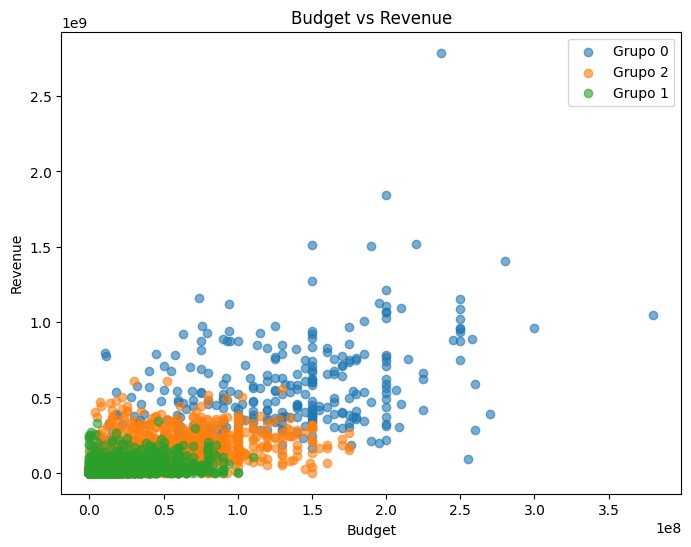

In [61]:
plt.figure(figsize=(8, 6))

for c in numericas['cluster'].unique():
    datos_cluster = numericas[numericas['cluster'] == c]
    plt.scatter(
        datos_cluster['budget'],
        datos_cluster['revenue'],
        label=f'Grupo {c}',
        alpha=0.6
    )

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.legend()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [62]:
tsne = TSNE(n_components=2, random_state=12)
X_tsne = tsne.fit_transform(variables_escaladas)

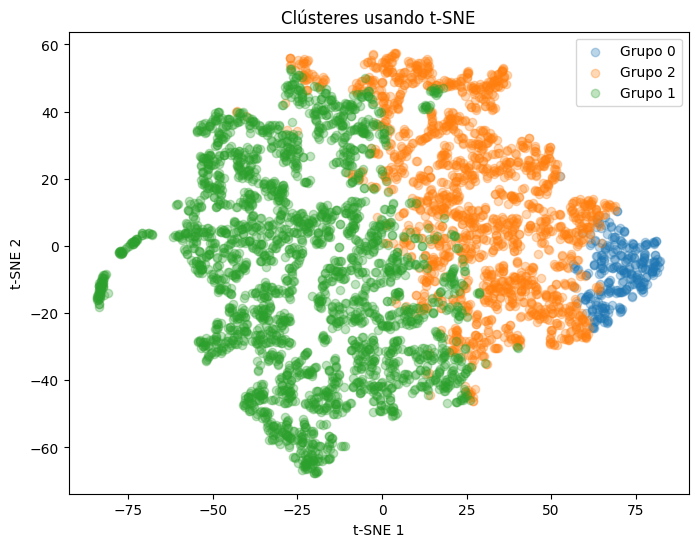

In [63]:
plt.figure(figsize=(8, 6))

for clusters in numericas['cluster'].unique():
    plt.scatter(
        X_tsne[numericas['cluster'] == clusters, 0],
        X_tsne[numericas['cluster'] == clusters, 1],
        label=f'Grupo {clusters}',
        alpha=0.3
    )

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clústeres usando t-SNE')
plt.legend()
plt.show()


Ya que se recomienda utilizar otra técnica de agrupamiento, se usa t-SNE. Al usar este método se obtiene una separación de grupos mucho más clara y menos solapamiento entre ellos. Este método no proporciona varianza explicada, sin embargo aporta al análisis exploratorio.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [64]:
# Calcular la métrica de la silueta
silhouette = silhouette_score(variables_escaladas, kmeans.labels_)

# Mostrar el resultado
print(f"Métrica de la silueta: {silhouette:.4f}")

Métrica de la silueta: 0.2666


La métrica de la silueta obtenida es 0.2666, lo cual indica que los clústeres presentan una calidad aceptable, aunque la separación entre los grupos no es completamente clara. Se recomienda usar otros métodos para mejorar la estructura de los clusters al usar este conjunto de datos.